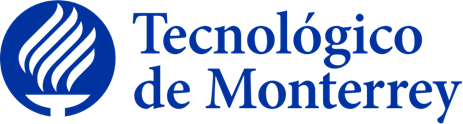

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Visión computacional para imágenes y video - TC4033.10**
### Prof: Dr. Gilberto Ochoa Ruiz

## **Actividad: 2.2 Google Colab - Simple_ImgProcessing**
### Enero 21 de 2024

Los ejercicios que deben agregarse a este proyecto serán las siguientes:

1. Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.
2. Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.
3. Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.
4. Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en en una fila de google collab, justificar brevemente tu investigación, haciendo una demo sencilla.


## **Nombres y matrículas de los integrantes del Equipo 24:**

* Victor Alejandro Regueira Romero | A01794404
* Fernando Maytorena Espinosa de los Monteros | A01110946
* Edgar Rodolfo Escobar Gómez | A01793900
* Jonathan Garza Bennet | A01793038
* Rafael José Mateo Comprés | A01793054

Nota: Nuestro código de la actividad se encuentra al final, después del código de ejemplo suministrado por el profesor.

# 1. Simple Image Operations

## Table of Contents
1. [Libraries](#libraries)
1. [Funciones Auxiliares](#funciones)
2. [Loading Images](#loading)
3. [Resizing Images](#resize)
4. [Negative Images](#negative)
5. [Logarithmic Transformation](#log)
6. [Image Binarizer](#bin)
7. [Image Quantizer](#quant)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

: 

## Nuestras Funciones Auxiliares <a class="anchor" id="funciones" ></a>

In [ ]:
import urllib.request

: 

In [ ]:

import urllib.request

def load_imgURL_CV2(imgURL, flags=-1):
  req = urllib.request.urlopen(imgURL)
  arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
  return cv2.imdecode(arr, flags)

def load_imgURL_PIL(imgURL):
  urllib.request.urlretrieve(imgURL, 'tempImg')
  return Image.open('tempImg')

: 

Código para montar el drive de la máquina temporal donde corre Google Colab.

También creamos el directorio `data` ya que es usado para algunas pruebas.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# import os

# datadir = './data'

# if not os.path.exists(datadir):
#   os.mkdir(datadir)
#   print("%s ha sido creado!" % datadir)
# else:
#   print("Directorio %s ya existe" % datadir)


: 

Imágenes a usar

In [ ]:
CHESSBOARD_JPG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/chessboard.jpg'
CONVOLUTION_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/convolution.png'
ELON_1_JPG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/elon_1.jpg'
ELON_2_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/elon_2.png'
IMAGE_JPG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image.jpg'
IMAGE_01_01_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image_01_01.png'
IMAGE_01_02_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image_01_02.png'
IMAGE_02_01_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image_02_01.png'
IMAGE_02_02_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/image_02_02.png'
IMG_NPY = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/img.npy'
LINEAR_GRADIENT_PNG = 'https://raw.githubusercontent.com/CV-INSIDE/computer-vision-course/main/data/linear_gradient.png'

IMAGEN_GRIS = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/blox.jpg'

: 

Imágenes actividad

In [ ]:
#IMAGE_BRAIN

: 

## Loading Images <a class="anchor" id="loading"></a>

In [ ]:
#Código original
#img1 = mpimg.imread('data/image.jpg')

#Nuestro código para permitir abrir las imágenes en nuestro repositorio
img1 = mpimg.imread(urllib.request.urlopen(IMAGE_JPG), 'jpg') #mpimg.imread(urllib.request.urlopen(image, 'jpg')
plt.imshow(img1)
print(type(img1))

: 

Look at the shape of this array:

In [ ]:
img1.shape

: 

The image is actually composed of three "layers, or *channels*, for red, green, and blue (RGB) pixel intensities.

Display the same image but this time we'll use another popular Python library for working with images - **cv2**.

In [ ]:
#img2 = cv2.imread('data/image.jpg')
img2 = load_imgURL_CV2(IMAGE_JPG)
plt.imshow(img2)
type(img2)

: 

The trouble is that cv2 loads the array of image data with the channels ordered as blue, green, red (BGR) instead of red, green blue (RGB).

Let's fix that

In [ ]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
print(plt.imshow(img2))
type(img2)

: 

Lastly, one more commonly used library for image processing in Python we should consider - **PIL**:

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

#img3 = Image.open('data/image.jpg')
img3 = load_imgURL_PIL(IMAGE_JPG)
plt.imshow(img3)
print(type(img3))

: 

It's easy to convert a PIL JpegImageFile to a numpy array

In [ ]:
img3 = np.array(img3)
img3.shape

: 

Saving a numpy array in an optimized format, should you need to persist images into storage

In [ ]:
# Save the image
np.save('data/img.npy', img3)

# Load the image
img3 = np.load('data/img.npy')

plt.imshow(img3)

: 

## Resizing an Image <a class="anchor" id="resize"></a>
One of the most common manipulations of an image is to resize it.

Generally, we want to ensure that all of your training images have consistent dimensions.

In [ ]:
from PIL import Image, ImageOps

# Load the image array into a PIL Image
orig_img = Image.fromarray(img3)

# Get the image size
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 200 x 200
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


: 

If we want to resize the image and change its shape without distorting it, we'll need to *scale* the image so that its largest dimension fits our new desired size.

In [ ]:
# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# Scale the image to the new size using the thumbnail method
scaled_img = orig_img
#Original, cambiado para evitar el warning
#scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_img.thumbnail(target_size, Image.Resampling.LANCZOS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)

# Create a new white image of the target size to be the background
new_img = Image.new("RGB", target_size, (255, 255, 255))

# paste the scaled image into the center of the white background image
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

: 

## Negative Images <a class="anchor" id="negative"></a>

In [ ]:
#orig_img = cv2.imread('data/image.jpg')
orig_img = load_imgURL_CV2(IMAGE_JPG)

orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

: 

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

: 

## Logarithmic Transformation <a class="anchor" id="log"></a>

$$
S = c * log (1 + r)
$$

where,
- $R$ = input pixel value
- $C$ = scaling constant and
- $S$ = output pixel value

The value of $c$ is chosen such that we get the maximum output value corresponding to the bit size used. So, the formula for calculating $c$  is as follows:

$c = 255 / (log (1 + $ max input pixel value $))$

In [ ]:
#orig_img = cv2.imread('data/image.jpg')
orig_img = load_imgURL_CV2(IMAGE_JPG)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

# Apply log transformation method
c = 255 / np.log(1 + np.max(orig_img))
log_img = c * (np.log(orig_img + 1))

# Specify the data type so that
# float value will be converted to int
log_img = np.array(log_img, dtype = np.uint8)

: 

Log transformation of gives actual information by enhancing the image. If we apply this method in an image having higher pixel values then it will enhance the image more and actual information of the image will be lost.

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(log_img)
a.set_title('Logarithmic Image')

plt.show()

: 

## Image Binarizer (Thresholding) <a class="anchor" id="bin"></a>

Binarize pixels (set pixel values to 0 or 1) according to a threshold.

In [ ]:
#orig_img = cv2.imread('data/linear_gradient.png')
orig_img = load_imgURL_CV2(IMAGEN_GRIS)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

ret,thresh1 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(orig_img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(orig_img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(orig_img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [orig_img, thresh1, thresh2, thresh3, thresh4, thresh5]
n = np.arange(6)

fig = plt.figure(figsize=(20, 8))
for i in n:
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
  plt.title(titles[i])

plt.show()

: 

## Image Quantizer  <a class="anchor" id="quant"></a>

In [ ]:
#orig_img = cv2.imread('data/image.jpg')
orig_img = load_imgURL_CV2(IMAGE_JPG)

Z = orig_img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
def colorQuant(Z, K, criteria):

   ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

   # Now convert back into uint8, and make original image
   center = np.uint8(center)
   res = center[label.flatten()]
   res2 = res.reshape((orig_img.shape))
   return res2
res1 = colorQuant(Z, 2, criteria)
res2 = colorQuant(Z, 5, criteria)
res3 = colorQuant(Z, 8, criteria)

fig = plt.figure(figsize=(12, 8))

plt.subplot(221),plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(222),plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))
plt.title('K=8')

plt.subplot(223),plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.title('K=4')

plt.subplot(224),plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB))
plt.title('K=2')

plt.show()

: 

#Actividades

##  1- Investiga 3 tipos de transformaciones pixel a pixel

**1. Las transformaciones pixel a pixel son sumamente utilizadas para aumentar la cantidad de imágenes para entrenar modelos de inteligencia artificial, sobre todo aquellas de tipo fotométrico. Investiga 3 tipos de transformaciones y aplicarlas en el proyecto de Google Collab sobre imágenes propias.**



**Transformación 1:**

**Fourier**

La transformada de Fourier se utiliza en visión computacional, incluyendo el procesamiento de imágenes con OpenCV, por varias razones. La transformada de Fourier es una técnica matemática que permite analizar una señal o una imagen en términos de sus componentes de frecuencia. En el contexto de imágenes, la transformada de Fourier se aplica para pasar de la representación de píxeles en el dominio espacial a la representación en el dominio de la frecuencia.

* Al trabajar en el dominio de la frecuencia, es posible realizar filtrado para eliminar o atenuar ciertas frecuencias. Esto puede ser útil para eliminar ruido, resaltar características específicas o aplicar otros efectos de procesamiento de imágenes.

* El análisis de frecuencia puede ayudar a identificar patrones o texturas específicas en una imagen, lo que es útil en aplicaciones como reconocimiento de objetos o detección de bordes.

In [ ]:
#Definimos el path a las imágenes de prueba
IMAGE_VOLLEYBALL = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/Volleyball.jpg'

import numpy as np

ori_image = load_imgURL_CV2(IMAGE_VOLLEYBALL)

# Convert to RGB
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

# now we will be loading the image and converting it to grayscale
gray = cv2.cvtColor(ori_image, cv2.COLOR_RGB2GRAY)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the magnitude of the Fourier Transform

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(121)
imgplot = plt.imshow(ori_image)
a.set_title('Before Fourier Transformation')

# Subplot for resized image
a=fig.add_subplot(122)
imgplot = plt.imshow(magnitude, cmap='gray')
a.set_title('After Fourier Transformation')

plt.show()



: 

In [ ]:
ori_image = load_imgURL_CV2(IMAGE_VOLLEYBALL)
# Convert to RGB
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(ori_image, cv2.COLOR_RGB2GRAY)
# calculating the discrete Fourier transform
DFT = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
#DFT = cv2.dft(np.float32(ori_image), flags=cv2.DFT_COMPLEX_OUTPUT)

# reposition the zero-frequency component to the spectrum's middle
shift = np.fft.fftshift(DFT)
row, col = ori_image.shape[0], ori_image.shape[1]
center_row, center_col = row // 2, col // 2

# create a mask with a centered square of 1s
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1

# put the mask and inverse DFT in place.
fft_shift = shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)

# calculate the magnitude of the inverse DFT
imageThen = cv2.magnitude(imageThen[:,:,0], imageThen[:,:,1])

# visualize the original image and the magnitude spectrum
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(ori_image, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(imageThen, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

: 

**Transformación 2:**

**Transformada de Coseno Discreta (DCT)**

Es una herramienta valiosa en visión computacional, especialmente en el ámbito de la compresión de imágenes y la representación eficiente de información visual. Su aplicación principal se encuentra en algoritmos de compresión que buscan reducir el tamaño de las imágenes sin comprometer significativamente la calidad visual.

La DCT descompone una imagen en una serie de coeficientes que representan diferentes frecuencias espaciales presentes en la imagen.

* **Compresión de imágenes:** La DCT es ampliamente utilizada en algoritmos de compresión de imágenes, como en el estándar JPEG. La propiedad clave de la DCT que hace que sea útil para la compresión es su capacidad para concentrar la energía de la señal en un número reducido de coeficientes. Esto permite la eliminación de componentes de frecuencia de baja energía, reduciendo así la cantidad de datos necesarios para representar la imagen.

* **Transformada en bloques:** En aplicaciones prácticas, la DCT se aplica generalmente a bloques de píxeles en lugar de a la imagen completa. Cada bloque se somete a la transformada, y luego se pueden cuantificar y comprimir los coeficientes resultantes.

In [ ]:
import numpy as np
import urllib.request

: 

In [ ]:
# Función para cargar una imagen desde una URL
def load_imgURL_CV2(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

# Definimos el path a las imágenes de prueba
IMAGE_VOLLEYBALL = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/Volleyball.jpg'

# Cargamos la imagen y la convertimos a escala de grises
ori_image = load_imgURL_CV2(IMAGE_VOLLEYBALL)
gray = cv2.cvtColor(ori_image, cv2.COLOR_BGR2GRAY)

# Aplicar la Transformada de Coseno Discreta (DCT)
dct = cv2.dct(np.float32(gray)/255.0)  # Normalizar la imagen a [0,1]

# Escalar el resultado para la visualización
dct_log = np.log(abs(dct))  # Tomar el logaritmo para mejorar la visualización
dct_display = cv2.normalize(dct_log, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Mostrar la imagen original y la transformada
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(121), plt.imshow(cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Imagen con DCT
plt.subplot(122), plt.imshow(dct_display, cmap='gray')
plt.title('DCT of Image'), plt.xticks([]), plt.yticks([])

plt.show()

: 

**Transformación 3:**

**Filtrado de Colores**

El filtrado de imágenes aumenta el contraste, la resolución utilizable, la calidad de imagen y, lo que es más importante, reduce drásticamente la interferencia de la luz ambiental, que es la razón número uno por la que una aplicación de visión artificial no funciona como se esperaba.

Es una técnica utilizada para resaltar, suprimir o aislar píxeles de una imagen basándose en su color. Este proceso puede tener diversas aplicaciones en procesamiento de imágenes y visión por computadora. A continuación, se mencionan algunas de las utilidades más comunes:

*    **Segmentación de objetos:** Filtrar colores es una técnica eficaz para segmentar objetos o regiones específicas en una imagen basándose en su color. Esto es especialmente útil en aplicaciones como la detección de objetos, seguimiento de objetos en movimiento y análisis de imágenes médicas.

*    **Detección de características:** En aplicaciones de visión por computadora, el filtrado de colores se utiliza a menudo para destacar características específicas de interés en una imagen. Por ejemplo, en el campo de la robótica, se puede usar para identificar y seguir líneas en un entorno.

*    **Reconocimiento de patrones:** El filtrado de colores puede ser esencial en el reconocimiento de patrones basado en colores, como la identificación de logotipos, señales o marcas específicas en imágenes.

In [ ]:
# Cargar la imagen
imagen = load_imgURL_CV2(IMAGE_VOLLEYBALL)

# Convertir la imagen de BGR a HSV (espacio de color que facilita el filtrado por color)
imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

# Definir un rango de colores a filtrar (en este caso, filtrar azules)
rango_bajo = np.array([100, 50, 50])
rango_alto = np.array([130, 255, 255])

# Crear una máscara usando el rango definido
mascara = cv2.inRange(imagen_hsv, rango_bajo, rango_alto)

# Aplicar la máscara a la imagen original
resultado = cv2.bitwise_and(imagen, imagen, mask=mascara)

# Mostrar la imagen original y la imagen filtrada
plt.imshow(imagen)
plt.imshow(resultado)

: 

**Transformación 4 - Enfocar una imagen**

El enfoque es una técnica que permite mejorar la nitidez de esta cuando la imagen se encuentra desenfocada. Esta técnica es útil para poder reconocer mejor el objeto que se encuentra en la imagen. La desventaja de este método es que agrega ruido a la imagen, por lo que la hace ver "granulada" o "pixelada".

In [ ]:
BLURRY_IMG = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/front_face.jpg'

def sharp_image():
    img = load_imgURL_CV2(BLURRY_IMG)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    kernel = np.array([[-1.2,-1.2,-1.3], [-1.3,10.4,-1.2], [-1.3,-1.3,-1.3]])
    sharpened = cv2.filter2D(img, -1, kernel)


    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(img, cmap='gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(sharpened, cmap='gray')
    plt.title('Sharpenned'), plt.xticks([]), plt.yticks([])
    plt.show()

sharp_image()

: 

## 2- Aplicación del negativo de imagen

**2. Investiga una aplicación donde obtener el negativo de imagen tenga un valor específico e integra el código en en una fila de google collab, justificar brevemente tu investigación y haciendo una demo sencilla.**


La aplicación de un negativo a una imagen implica invertir los valores de intensidad de los píxeles, convirtiendo los píxeles más oscuros en más claros y viceversa. Este proceso puede ser útil para obtener un efecto visual interesante, realzar ciertos detalles o simplemente cambiar la apariencia de la imagen.

* Mejora de contraste: Al aplicar negativos, se pueden realzar los detalles en áreas de baja intensidad, lo que puede mejorar el contraste en ciertas partes de la imagen. Esto puede ser útil en aplicaciones médicas para resaltar detalles en imágenes médicas, como radiografías.
* En la astronomía, la inversión de intensidades puede ser utilizada para resaltar características específicas en imágenes de objetos astronómicos.

In [ ]:
IMAGE_APPLE = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/apple.jpg'

orig_img = load_imgURL_CV2(IMAGE_APPLE)

orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
img_neg = 255 - orig_img

: 

In [ ]:
fig = plt.figure(figsize=(8, 8))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

a = fig.add_subplot(2,1,2)
imgplot = plt.imshow(img_neg)
a.set_title('Negative')

plt.show()

: 

## 3- Aplicación de corrección de gamma

**3. Investiga una aplicación donde se puede aplicar la corrección de gamma en una imagen. Integra el código en en una fila de google collab, justifica brevemente tu investigación y haz una demo sencilla.**


In [ ]:
def getgammaima(im,g):
  im = load_imgURL_CV2(im)
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  gamma = g
  # Apply gamma correction.
  gamma_corrected = np.array(255*(im / 255) ** gamma, dtype = 'uint8')
  return gamma_corrected

: 

In [ ]:
fig = plt.figure(figsize=(12, 8))

# Subplot for gamma images
a=fig.add_subplot(221)
imgplot = plt.imshow(getgammaima(IMAGE_VOLLEYBALL,0.1))
a.set_title('Gamma 0.1')

a = fig.add_subplot(222)
imgplot = plt.imshow(getgammaima(IMAGE_VOLLEYBALL,0.5))
a.set_title('Gamma 0.5')

a=fig.add_subplot(223)
imgplot = plt.imshow(getgammaima(IMAGE_VOLLEYBALL,1.2))
a.set_title('Gamma 1.2')

a = fig.add_subplot(224)
imgplot = plt.imshow(getgammaima(IMAGE_VOLLEYBALL,2.2))
a.set_title('Gamma 2.2')

plt.show()

: 

Si quires probar otro tipo de valor de gamma, selecciona el valor en el siguiente slider y presiona Ctrl + Enter

In [ ]:
slider_value = 1.3 # @param {type:"slider", min:0.1, max:4, step:0.3}
plt.imshow(getgammaima(IMAGE_VOLLEYBALL,slider_value))

: 

## 4- Aplicación de sustracción de imágenes

**4. Investiga una aplicación donde se puede usar la sustracción de imágenes e integra el código en una fila de google colab, justificar brevemente tu investigación, haciendo una demo sencilla.**

Una de las aplicaciones en las que más se usa la sustracción de imágenes es en la detección de movimiento. Incluso aquellos movimientos imperceptibles para el ojo humano puede ser detectados muy fácilmente usando esta transformación y el programa adecuado.

A continuación presentamos una serie de fotos tomadas de video que detecta pequeños movimiento faciales como parpadeo. Incluso con mejor iluminación, podrían llegar a detectarse movimientos pupilares que, con el modelo adecuado, pueden ser usados para control de dispositivos con el ojo, por ejemplo el cursor en la pantalla de un computador para personas discapacitadas.

Finalmente, vale la pena mencionar una de las aplicaciones más tradicionales, la de monitoreo de seguridad, en la cual, las imágenes generadas por cámaras de video digitales son procesadas por software o modelos especializados para emitir de alertas de movimiento. Esto sin necesidad de tener un operador mirando continuamente las pantallas.

In [ ]:
#Definimos el path a las imágenes de prueba
IMAGE_01 = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/20240116_191411_001.jpg'
IMAGE_02 = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/20240116_191411_002.jpg'
IMAGE_03 = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/20240116_191411_003.jpg'
IMAGE_04 = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/20240116_191411_004.jpg'
IMAGE_05 = 'https://raw.githubusercontent.com/Edgar-IAH/TC4033data/main/data22/20240116_191411_005.jpg'

#Creamos un array con los nombres de las imágenes de prueba a partir de una lista
lista_nombres_imagenes = [IMAGE_01, IMAGE_02, IMAGE_03, IMAGE_04, IMAGE_05]
nombres_imagenes = np.array(lista_nombres_imagenes)

#Definimos una lista vacía donde las almacenaremos
lista_imagenes = []

#Cargamos las imágenes de prueba en un array y las hacemos del mismo tamaño
for i in nombres_imagenes:
  img = load_imgURL_CV2(i)
  lista_imagenes.append(cv2.resize(img,(600, 450), interpolation = cv2.INTER_CUBIC))

imagenes = np.array(lista_imagenes)

fig, axes = plt.subplots(5, 3, figsize=(8,15))
#fig.tight_layout(h_pad=1.5)

#Ya teniéndolas cargadas en el array, calculamos la diferencia entre cada par consecutivo
#y desplegamos
for i, imagen in enumerate(imagenes):
  # La primera no hay con qué compararla
  if i == 0:
    ax = plt.subplot(5, 3, 1)
    ax.set_title(f"Original - Secuencia {i+1}")
    plt.imshow(imagen)
  else:
    diferencia = cv2.subtract(cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY), cv2.cvtColor(imagenes[i-1], cv2.COLOR_BGR2GRAY))
    #Aplicamos un filtro a la diferencia para eliminar el ruido
    diferencia_filtrada = np.copy(diferencia)
    diferencia_filtrada[diferencia_filtrada <35] = 0
    #Amplificamos la diferencia usando la equalización por histograma
    diferencia_equalizada = cv2.equalizeHist(diferencia_filtrada)
    #Desplegamos el original
    ax = plt.subplot(5, 3, i*3+1)
    ax.set_title(f"Original - Secuencia {i+1}")
    plt.imshow(imagen)
    #Desplegamos la diferencia con la anterior
    ax = plt.subplot(5, 3, i*3+2)
    ax.set_title(f"Diferencia {i+1} - {i}")
    plt.imshow(diferencia, cmap='gray')
    #Desplegamos la diferencia equalizada
    ax = plt.subplot(5, 3, i*3+3)
    ax.set_title(f"Dif. Eq. {i+1} - {i}")
    plt.imshow(diferencia_equalizada, cmap='gray')




: 

Nótese como la equalización de la diferencia las acentúa permitiendo una mejor detección, aunque al mismo tiempo, dependiendo de la aplicación, (por ejemplo detección de movimiento) el número de falso positivos podría aumentar.

A continuación podemos observar los histogramas de las últimas tres imágenes, la original, la diferencia con la anterior y la imagen de la diferencia ecualizada.

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(4,8))
fig.tight_layout(h_pad=2)

ax = plt.subplot(3, 1, 1)
ax.set_title("Histograma de la Ultima Imagen - Original")
hist,bins = np.histogram(imagen.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(imagen.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'lower right')

ax = plt.subplot(3, 1, 2)
ax.set_title("Histograma de la Diferencia")
hist,bins = np.histogram(diferencia.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(diferencia.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'lower right')

ax = plt.subplot(3, 1, 3)
ax.set_title("Histograma de la Diferencia Ecualizada")
hist,bins = np.histogram(diferencia_equalizada.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(diferencia_equalizada.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

: 

# BIBLIOGRAFIA

* Gonzalez, R., y Woods, R. (2018). *Digital Image Processing*. 4th Edition. Pearson.
* GeeksforGeeks. (2023). *How to find the Fourier Transform of an image using OpenCV Python?* https://www.geeksforgeeks.org/how-to-find-the-fourier-transform-of-an-image-using-opencv-python/?ref=lbp



